Importing libraries and train data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv('data/train.csv')
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


We can see that we have 14 columns

-> 13 features and 1 target (Tranported)

Lets explore the features a bit more

In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


It appears we have some missing values in some columns

In [4]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<Axes: >

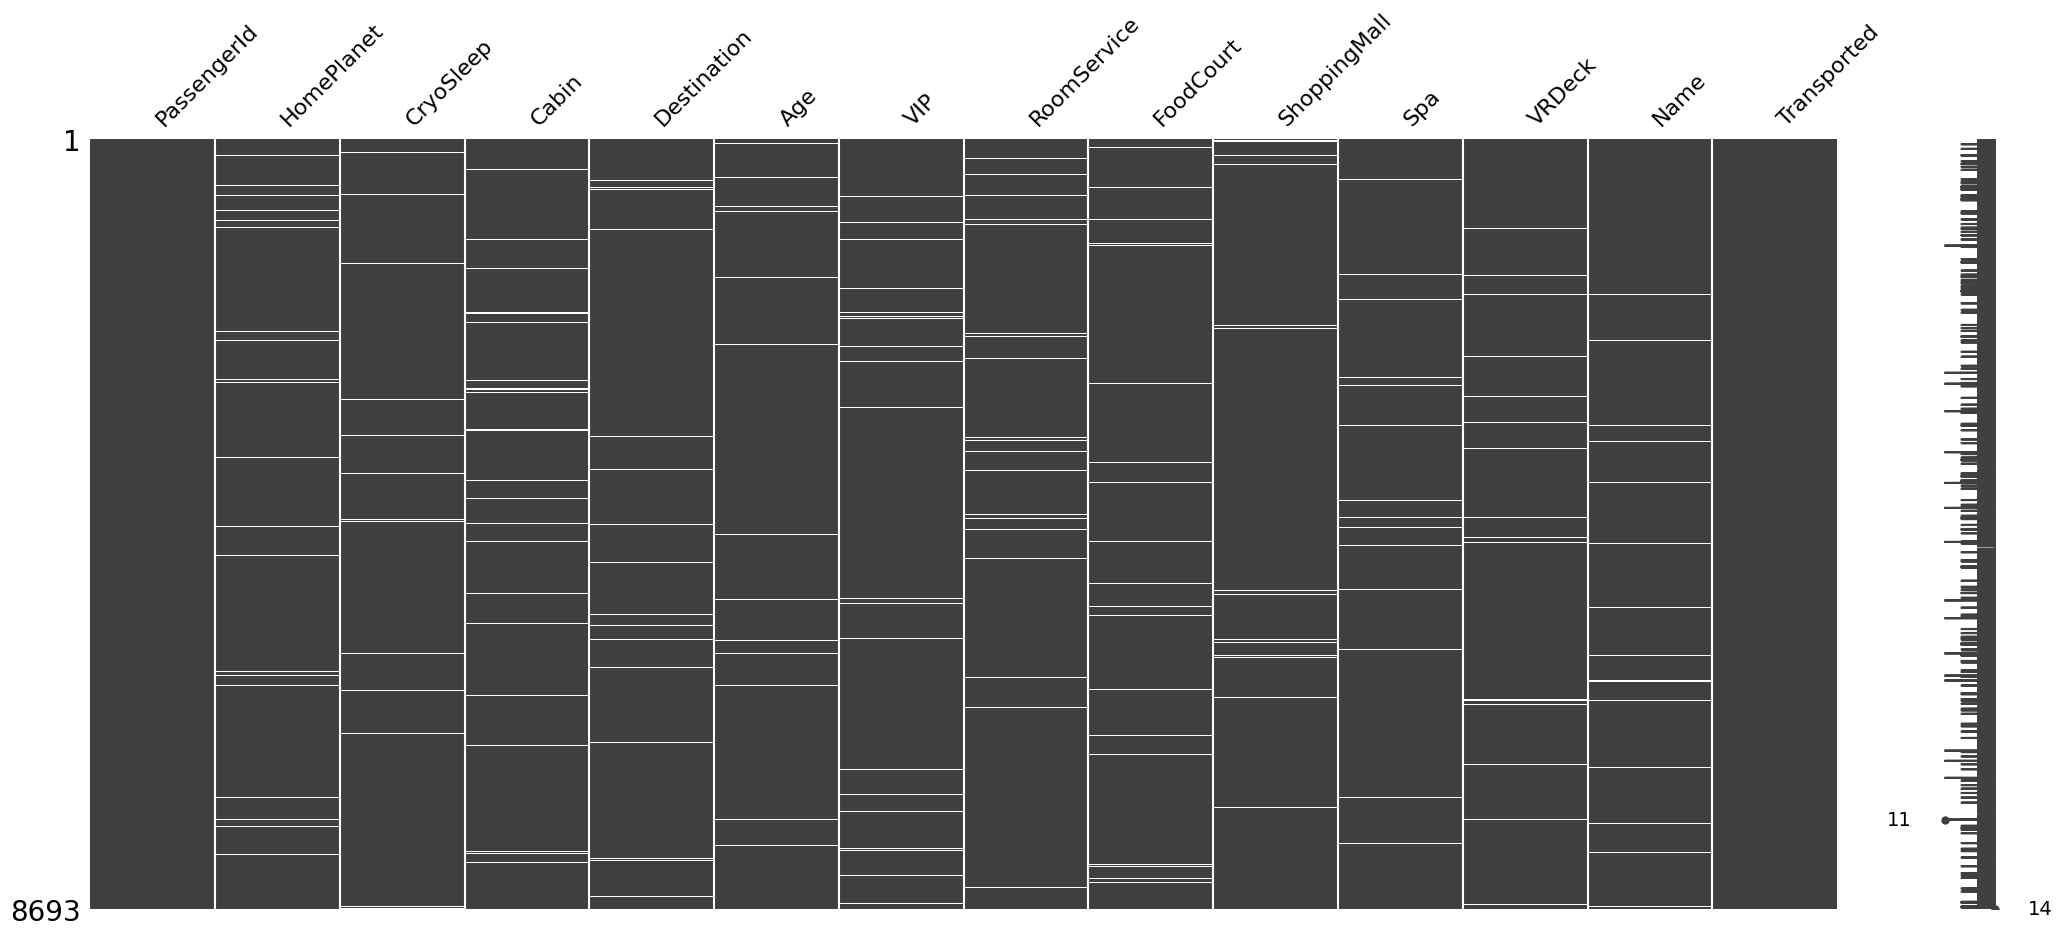

In [3]:
# we can explore missingness more in dpeth with missingno library
import missingno as msno
msno.matrix(train_df)


Based on the missingness matrix, we can observe that theres no patterns in the missingness. I would assume it is missing completely at random (MCAR)

## Exploring each Column

We can look at the unique number of values to determine whether our data is categorical or not. We can also be more specific and choose between ordinal and nominal data.

### PassengerID

In [5]:
train_df['PassengerId'].head()

0    0001_01
1    0002_01
2    0003_01
3    0003_02
4    0004_01
Name: PassengerId, dtype: object

### HomePlanet

In [7]:
train_df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

We can see that `HomePlanet` has 3 unique values, so it is a categorical nominal variable.

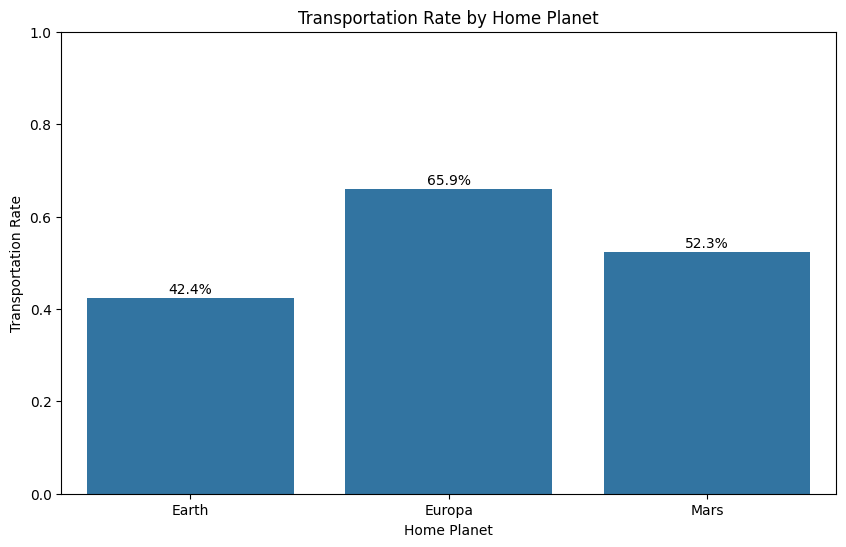


Transportation rates by planet:
HomePlanet
Earth     0.423946
Europa    0.658846
Mars      0.523024
Name: Transported, dtype: float64


In [6]:
# Calculate transportation rate by HomePlanet
transport_by_planet = train_df.groupby('HomePlanet')['Transported'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=transport_by_planet.index, y=transport_by_planet.values)
plt.title('Transportation Rate by Home Planet')
plt.xlabel('Home Planet')
plt.ylabel('Transportation Rate')
plt.ylim(0, 1)  # Set y-axis from 0 to 1 since we're dealing with proportions

# Add percentage labels on top of each bar
for i, v in enumerate(transport_by_planet.values):
    plt.text(i, v + 0.01, f'{v:.1%}', ha='center')

plt.show()

# Print the actual values
print("\nTransportation rates by planet:")
print(transport_by_planet)

In [8]:
# Perform chi-square test
contingency_table = pd.crosstab(train_df['HomePlanet'], train_df['Transported'])
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test p-value: {p_value}")


Chi-square test p-value: 2.809059985251311e-71


### CryoSleep

In [8]:
train_df['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

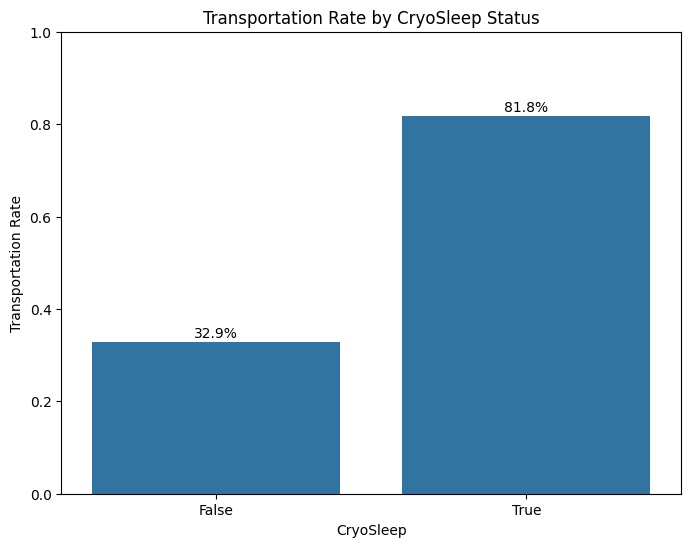


Transportation rates by CryoSleep status:
CryoSleep
False    0.328921
True     0.817583
Name: Transported, dtype: float64

Chi-square test p-value: 0.0000000000


In [9]:
# Calculate transportation rate by CryoSleep status
transport_by_cryo = train_df.groupby('CryoSleep')['Transported'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=transport_by_cryo.index, y=transport_by_cryo.values)
plt.title('Transportation Rate by CryoSleep Status')
plt.xlabel('CryoSleep')
plt.ylabel('Transportation Rate')
plt.ylim(0, 1)  # Set y-axis from 0 to 1 for proportions

# Add percentage labels on top of each bar
for i, v in enumerate(transport_by_cryo.values):
    plt.text(i, v + 0.01, f'{v:.1%}', ha='center')

plt.show()

# Print the actual values
print("\nTransportation rates by CryoSleep status:")
print(transport_by_cryo)

# Perform chi-square test
contingency_table = pd.crosstab(train_df['CryoSleep'], train_df['Transported'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test p-value: {p_value:.10f}")

### Cabin

In [10]:
train_df['Cabin'].nunique()

6560

We can see that Cabin is a more complex variable. We see there are 6500 unique values

We have an option to one hot encode and expand to a large amount of dimensions. We then could use a dimensionality reduciton technique such as PCA to reduce the number of dimensions.

In [12]:
# Split the 'Cabin' column into 'Deck', 'Number', and 'Side'
train_df[['Deck', 'Number', 'Side']] = train_df['Cabin'].str.split('/', expand=True)
train_df[['Deck', 'Number', 'Side']].head()

,Deck,Number,Side
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S


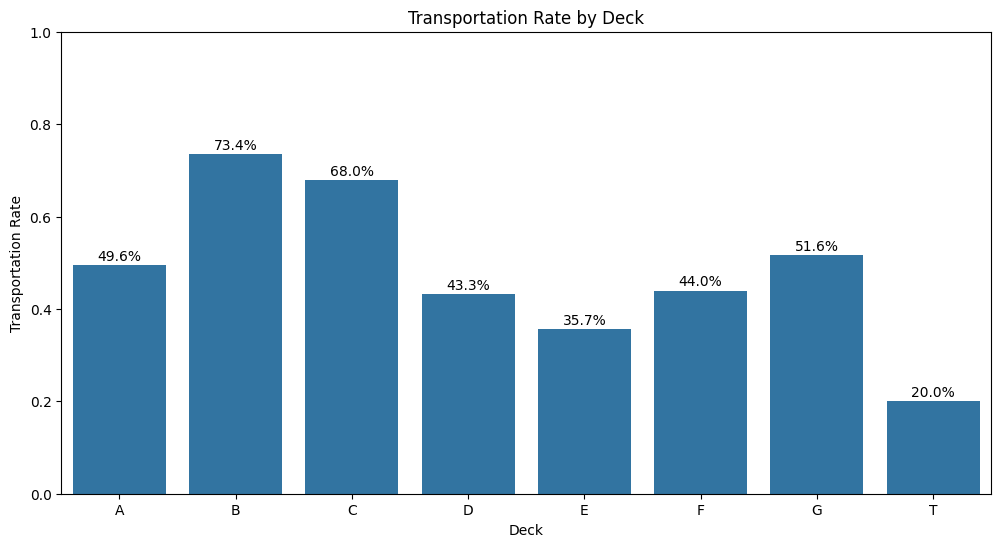

Deck Chi-square p-value: 0.0000000000


In [14]:
# Analyze Deck
transport_by_deck = train_df.groupby('Deck')['Transported'].mean()

# Create plot for Deck
plt.figure(figsize=(12, 6))
sns.barplot(x=transport_by_deck.index, y=transport_by_deck.values)
plt.title('Transportation Rate by Deck')
plt.xlabel('Deck')
plt.ylabel('Transportation Rate')
plt.ylim(0, 1)

# Add percentage labels
for i, v in enumerate(transport_by_deck.values):
    plt.text(i, v + 0.01, f'{v:.1%}', ha='center')
plt.show()

# Chi-square test for Deck
deck_contingency = pd.crosstab(train_df['Deck'], train_df['Transported'])
chi2, p_value, _, _ = chi2_contingency(deck_contingency)
print(f"Deck Chi-square p-value: {p_value:.10f}")


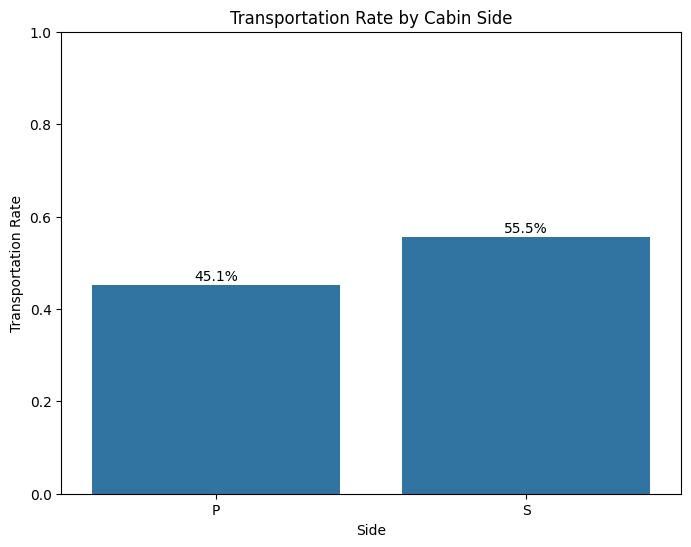

Side Chi-square p-value: 0.0000000000


In [15]:

# Analyze Side
transport_by_side = train_df.groupby('Side')['Transported'].mean()

# Create plot for Side
plt.figure(figsize=(8, 6))
sns.barplot(x=transport_by_side.index, y=transport_by_side.values)
plt.title('Transportation Rate by Cabin Side')
plt.xlabel('Side')
plt.ylabel('Transportation Rate')
plt.ylim(0, 1)

# Add percentage labels
for i, v in enumerate(transport_by_side.values):
    plt.text(i, v + 0.01, f'{v:.1%}', ha='center')
plt.show()

# Chi-square test for Side
side_contingency = pd.crosstab(train_df['Side'], train_df['Transported'])
chi2, p_value, _, _ = chi2_contingency(side_contingency)
print(f"Side Chi-square p-value: {p_value:.10f}")

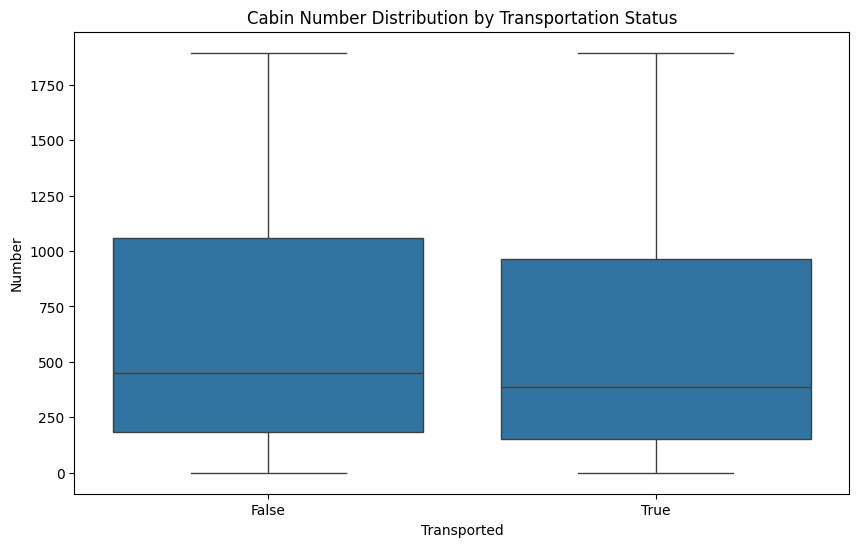

Cabin Number T-test p-value: 0.0000321370


In [17]:

# For Number (since it's numeric), let's create a boxplot
plt.figure(figsize=(10, 6))
train_df['Number'] = train_df['Number'].astype(float)  # Convert to numeric
sns.boxplot(x='Transported', y='Number', data=train_df)
plt.title('Cabin Number Distribution by Transportation Status')
plt.show()

# T-test for Number
from scipy.stats import ttest_ind
transported_numbers = train_df[train_df['Transported']]['Number'].dropna()
not_transported_numbers = train_df[~train_df['Transported']]['Number'].dropna()
t_stat, p_value = ttest_ind(transported_numbers, not_transported_numbers)
print(f"Cabin Number T-test p-value: {p_value:.10f}")


In [18]:

# Print some summary statistics
print("\nTransportation rates by Deck:")
print(transport_by_deck)
print("\nTransportation rates by Side:")
print(transport_by_side)
print("\nCabin Number summary statistics by Transportation:")
print(train_df.groupby('Transported')['Number'].describe())


Transportation rates by Deck:
Deck
A    0.496094
B    0.734275
C    0.680054
D    0.433054
E    0.357306
F    0.439871
G    0.516217
T    0.200000
Name: Transported, dtype: float64

Transportation rates by Side:
Side
P    0.451260
S    0.555037
Name: Transported, dtype: float64

Cabin Number summary statistics by Transportation:
              count        mean         std  min    25%    50%     75%     max
Transported                                                                   
False        4216.0  623.619070  525.438037  0.0  182.0  448.5  1060.0  1894.0
True         4278.0  577.453249  497.129959  0.0  154.0  385.0   964.0  1893.0


### Destination

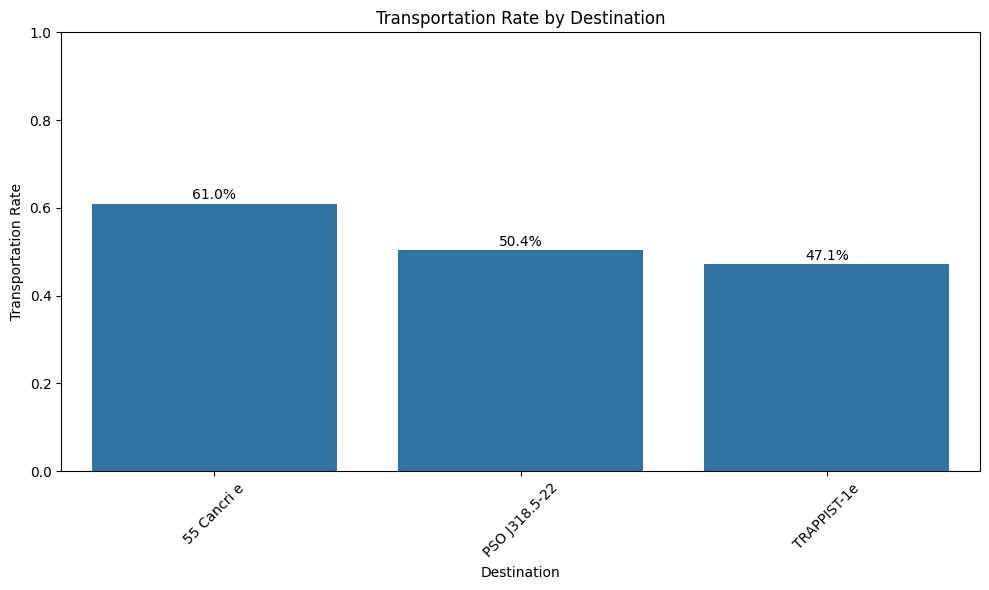


Transportation rates by destination:
Destination
55 Cancri e      0.610000
PSO J318.5-22    0.503769
TRAPPIST-1e      0.471175
Name: Transported, dtype: float64

Chi-square test p-value: 0.0000000000

Passenger counts by destination:
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


In [19]:
# Calculate transportation rate by Destination
transport_by_dest = train_df.groupby('Destination')['Transported'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=transport_by_dest.index, y=transport_by_dest.values)
plt.title('Transportation Rate by Destination')
plt.xlabel('Destination')
plt.ylabel('Transportation Rate')
plt.ylim(0, 1)  # Set y-axis from 0 to 1 since we're dealing with proportions
plt.xticks(rotation=45)  # Rotate labels for better readability

# Add percentage labels on top of each bar
for i, v in enumerate(transport_by_dest.values):
    plt.text(i, v + 0.01, f'{v:.1%}', ha='center')

plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

# Print the actual values
print("\nTransportation rates by destination:")
print(transport_by_dest)

# Perform chi-square test
contingency_table = pd.crosstab(train_df['Destination'], train_df['Transported'])
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test p-value: {p_value:.10f}")

# Print the counts for each destination
print("\nPassenger counts by destination:")
print(train_df['Destination'].value_counts())

We see that like HomePlnaet, Destination is a nominal categorical variable.

### Age

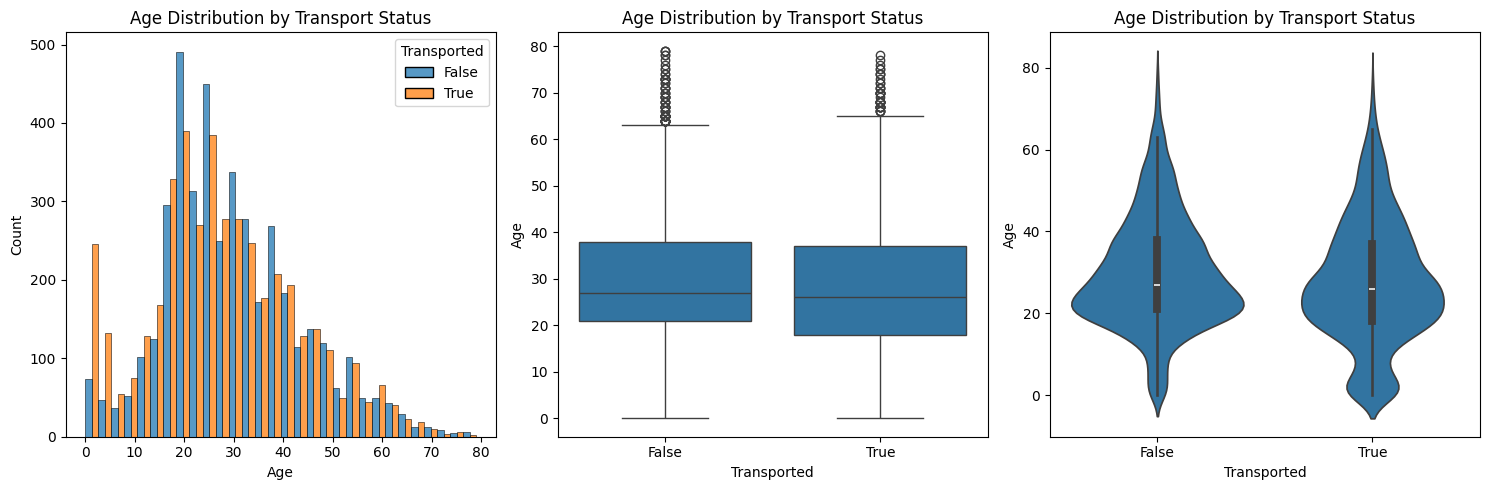


Age summary statistics by transportation status:
              count       mean        std  min   25%   50%   75%   max
Transported                                                           
False        4226.0  29.922858  13.699262  0.0  21.0  27.0  38.0  79.0
True         4288.0  27.748834  15.151705  0.0  18.0  26.0  37.0  78.0

t-test p-value: 0.0000000000


In [21]:
# Create a figure with multiple subplots
plt.figure(figsize=(15, 5))

# 1. Distribution plot
plt.subplot(1, 3, 1)
sns.histplot(data=train_df, x='Age', hue='Transported', bins=30, multiple="dodge")
plt.title('Age Distribution by Transport Status')
plt.xlabel('Age')
plt.ylabel('Count')

# 2. Box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=train_df, x='Transported', y='Age')
plt.title('Age Distribution by Transport Status')

# 3. Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(data=train_df, x='Transported', y='Age')
plt.title('Age Distribution by Transport Status')

plt.tight_layout()
plt.show()

# Statistical analysis
# T-test to compare ages between transported and non-transported
transported_ages = train_df[train_df['Transported']]['Age'].dropna()
not_transported_ages = train_df[~train_df['Transported']]['Age'].dropna()
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(transported_ages, not_transported_ages)

# Print summary statistics
print("\nAge summary statistics by transportation status:")
print(train_df.groupby('Transported')['Age'].describe())
print(f"\nt-test p-value: {p_value:.10f}")


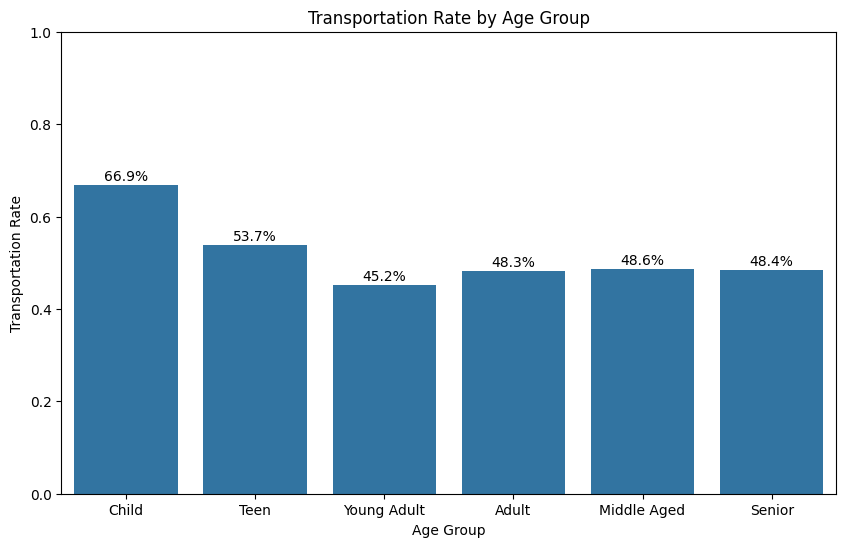


Transportation rates by age group:
AgeGroup
Child          0.668790
Teen           0.537299
Young Adult    0.451502
Adult          0.483135
Middle Aged    0.486486
Senior         0.484396
Name: Transported, dtype: float64

Chi-square test p-value for age groups: 0.0000000000


In [22]:

# Create age groups and analyze transportation rates
train_df['AgeGroup'] = pd.cut(train_df['Age'], 
                             bins=[0, 12, 18, 25, 35, 50, 100],
                             labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Middle Aged', 'Senior'])

# Calculate transportation rate by age group
transport_by_age = train_df.groupby('AgeGroup')['Transported'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=transport_by_age.index, y=transport_by_age.values)
plt.title('Transportation Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Transportation Rate')
plt.ylim(0, 1)

# Add percentage labels
for i, v in enumerate(transport_by_age.values):
    plt.text(i, v + 0.01, f'{v:.1%}', ha='center')

plt.show()

# Print transportation rates by age group
print("\nTransportation rates by age group:")
print(transport_by_age)

# Chi-square test for age groups
age_contingency = pd.crosstab(train_df['AgeGroup'], train_df['Transported'])
chi2, p_value, _, _ = chi2_contingency(age_contingency)
print(f"\nChi-square test p-value for age groups: {p_value:.10f}")

### VIP

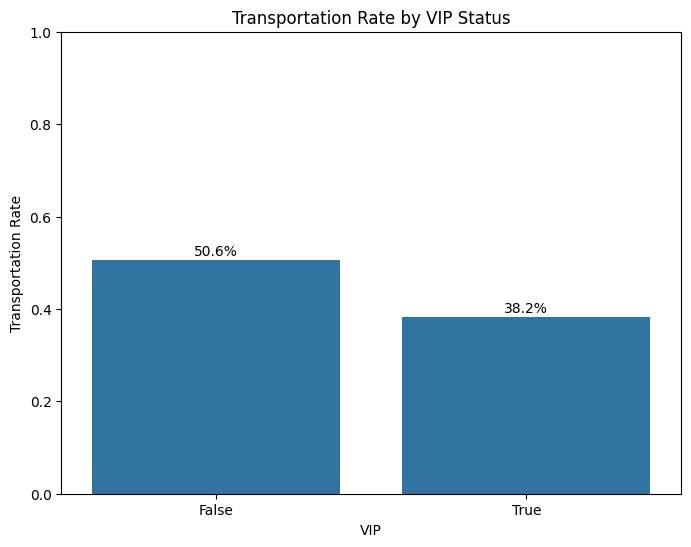


Transportation rates by VIP status:
VIP
False    0.506332
True     0.381910
Name: Transported, dtype: float64

VIP status counts:
False    8291
True      199
Name: VIP, dtype: int64

VIP status proportions:
False    97.7%
True      2.3%
Name: VIP, dtype: object

Chi-square test p-value: 0.0006804065

Cross-tabulation of VIP and Transported (row percentages):
Transported  False  True 
VIP                      
False        49.37  50.63
True         61.81  38.19


In [23]:
# Calculate transportation rate by VIP status
transport_by_vip = train_df.groupby('VIP')['Transported'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=transport_by_vip.index, y=transport_by_vip.values)
plt.title('Transportation Rate by VIP Status')
plt.xlabel('VIP')
plt.ylabel('Transportation Rate')
plt.ylim(0, 1)  # Set y-axis from 0 to 1 for proportions

# Add percentage labels on top of each bar
for i, v in enumerate(transport_by_vip.values):
    plt.text(i, v + 0.01, f'{v:.1%}', ha='center')

plt.show()

# Print the actual values and counts
print("\nTransportation rates by VIP status:")
print(transport_by_vip)
print("\nVIP status counts:")
print(train_df['VIP'].value_counts())
print("\nVIP status proportions:")
print(train_df['VIP'].value_counts(normalize=True).map('{:.1%}'.format))

# Perform chi-square test
contingency_table = pd.crosstab(train_df['VIP'], train_df['Transported'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test p-value: {p_value:.10f}")

# Create a cross-tabulation with percentages
cross_tab = pd.crosstab(train_df['VIP'], train_df['Transported'], normalize='index') * 100
print("\nCross-tabulation of VIP and Transported (row percentages):")
print(cross_tab.round(2))

VIP is a binary variable.

## Spending Features

`RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

In [34]:
def analyze_spending_feature(df, feature_name):
    """
    Analyze a spending feature and its relationship with transportation.
    
    Parameters:
    df: DataFrame
    feature_name: str, name of the spending column to analyze
    """
    plt.figure(figsize=(15, 5))
    
    # 1. Distribution plot
    plt.subplot(1, 3, 1)
    sns.histplot(data=df, x=feature_name, hue='Transported', bins=50, multiple="dodge")
    plt.title(f'{feature_name} Distribution')
    plt.xlabel(f'{feature_name} Amount')
    plt.ylabel('Count')
    
    # 2. Box plot
    plt.subplot(1, 3, 2)
    sns.boxplot(data=df, x='Transported', y=feature_name)
    plt.title(f'{feature_name} by Transport Status')
    
    # 3. Violin plot
    plt.subplot(1, 3, 3)
    sns.violinplot(data=df, x='Transported', y=feature_name)
    plt.title(f'{feature_name} Distribution by Transport Status')
    
    plt.tight_layout()
    plt.show()
    
    # Create spending groups
    df[feature_name] = df[feature_name].fillna(0)
    
    # Create bins with quantiles, handling zeros separately
    non_zero_mask = df[feature_name] > 0
    non_zero_values = df.loc[non_zero_mask, feature_name]
    
    if len(non_zero_values) > 0:
        bins = [0] + list(np.percentile(non_zero_values, [20, 40, 60, 80, 100]))
        labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
        df[f'{feature_name}_Group'] = pd.cut(df[feature_name], 
                                           bins=bins,
                                           labels=labels,
                                           include_lowest=True)
    else:
        df[f'{feature_name}_Group'] = pd.Categorical(['Very Low'] * len(df))
    
    # Transportation rate by spending group
    transport_by_spending = df.groupby(f'{feature_name}_Group')['Transported'].mean()
    
    # Bar plot for spending groups
    plt.figure(figsize=(10, 6))
    sns.barplot(x=transport_by_spending.index, y=transport_by_spending.values)
    plt.title(f'Transportation Rate by {feature_name} Spending Level')
    plt.xlabel('Spending Level')
    plt.ylabel('Transportation Rate')
    plt.ylim(0, 1)
    
    # Add percentage labels
    for i, v in enumerate(transport_by_spending.values):
        plt.text(i, v + 0.01, f'{v:.1%}', ha='center')
    plt.show()
    
    # Statistical tests and summary
    transported_spending = df[df['Transported']][feature_name].dropna()
    not_transported_spending = df[~df['Transported']][feature_name].dropna()
    stat, p_value = mannwhitneyu(transported_spending, not_transported_spending)
    
    # Print results
    print(f"\n=== {feature_name} Analysis ===")
    print("\nSummary statistics by transportation status:")
    print(df.groupby('Transported')[feature_name].describe())
    print(f"\nMann-Whitney U test p-value: {p_value:.10f}")
    
    # Zero spending analysis
    zero_spending = (df[feature_name] == 0).sum()
    zero_pct = (zero_spending/len(df))*100
    print(f"\nPassengers with zero {feature_name} spending: {zero_spending} ({zero_pct:.1f}%)")
    
    zero_transport_rate = df[df[feature_name] == 0]['Transported'].mean()
    nonzero_transport_rate = df[df[feature_name] > 0]['Transported'].mean()
    print(f"Transportation rate for zero spending: {zero_transport_rate:.1%}")
    print(f"Transportation rate for non-zero spending: {nonzero_transport_rate:.1%}")


### RoomService

 Amount the passenger has billed

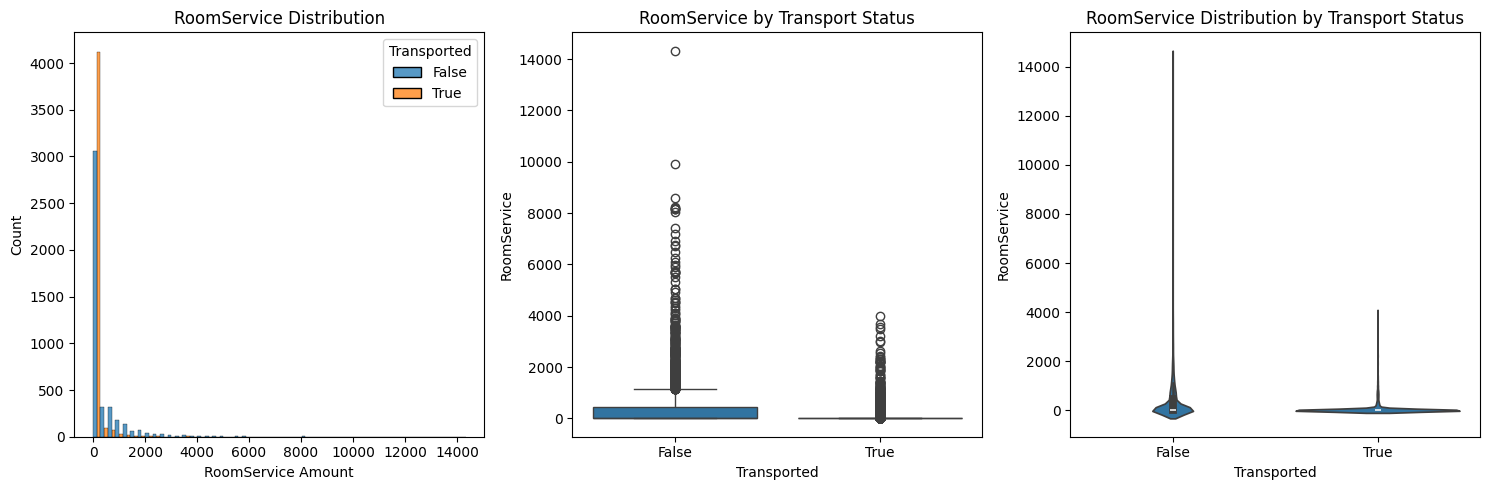

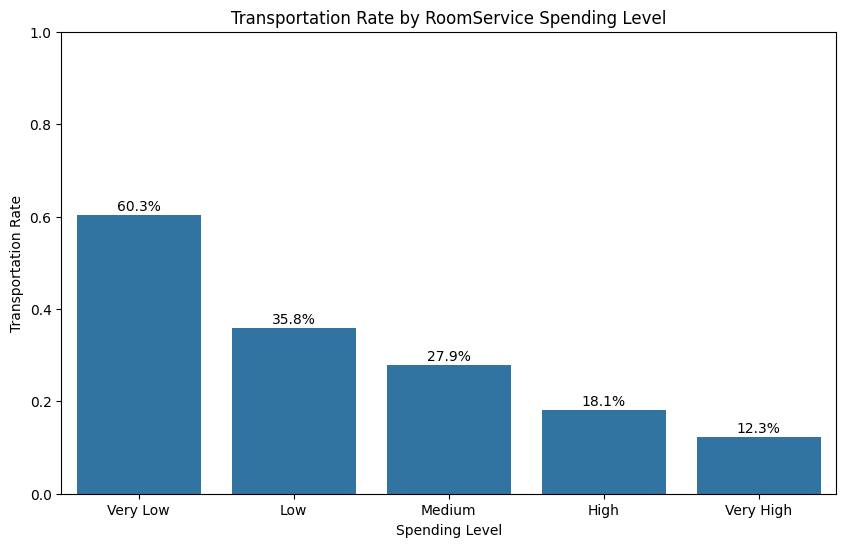


=== RoomService Analysis ===

Summary statistics by transportation status:
              count        mean         std  min  25%  50%    75%      max
Transported                                                               
False        4315.0  380.425261  867.576100  0.0  0.0  1.0  454.0  14327.0
True         4378.0   61.901782  272.330445  0.0  0.0  0.0    0.0   3992.0

Mann-Whitney U test p-value: 0.0000000000

Passengers with zero RoomService spending: 5758 (66.2%)
Transportation rate for zero spending: 62.8%
Transportation rate for non-zero spending: 26.0%


In [35]:
analyze_spending_feature(train_df, 'RoomService')

### FoodCourt

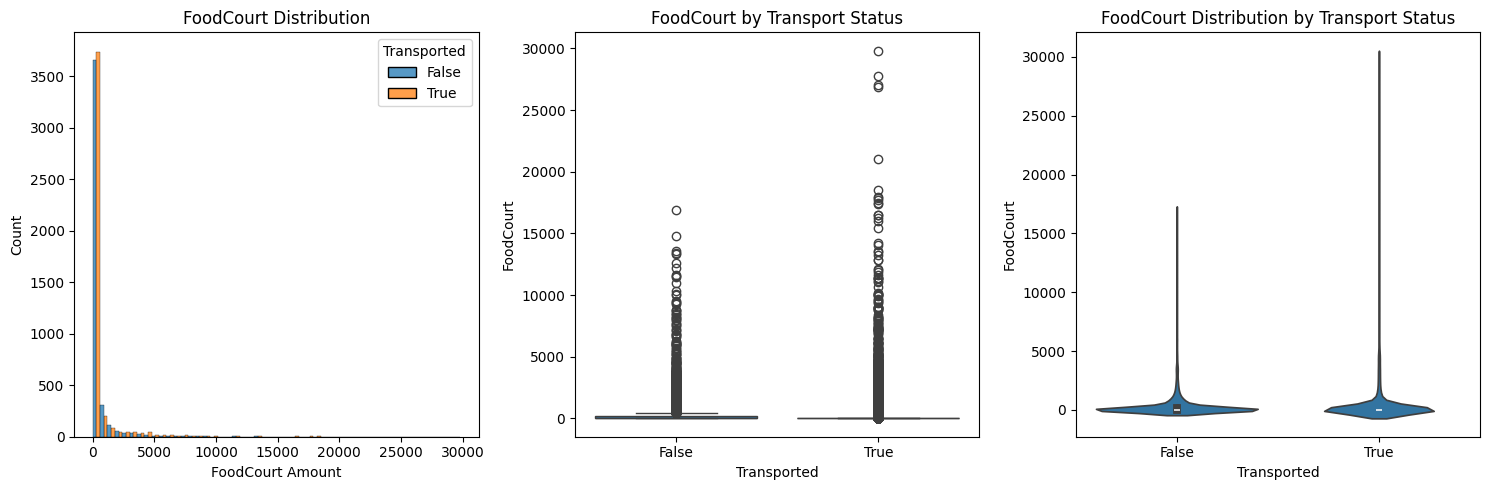

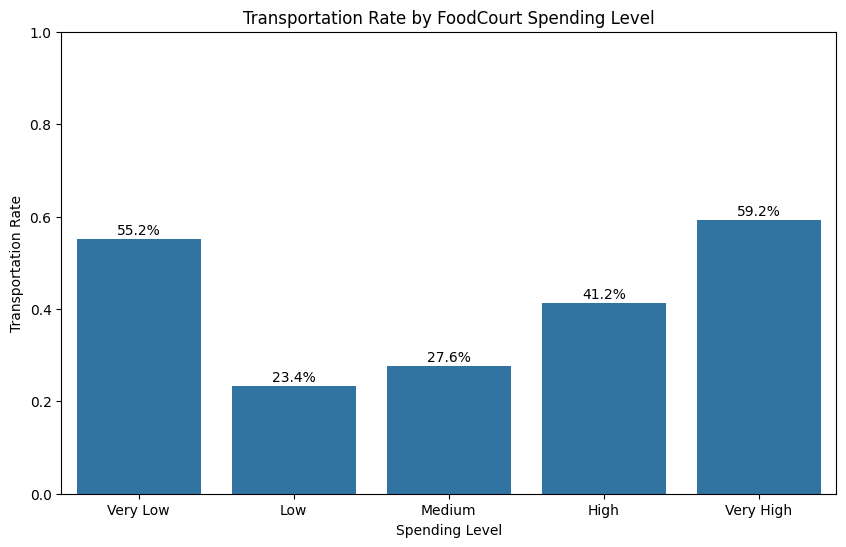


=== FoodCourt Analysis ===

Summary statistics by transportation status:
              count        mean          std  min  25%  50%    75%      max
Transported                                                                
False        4315.0  375.167555  1189.549556  0.0  0.0  0.0  168.5  16856.0
True         4378.0  520.646185  1910.982717  0.0  0.0  0.0    0.0  29813.0

Mann-Whitney U test p-value: 0.0000000000

Passengers with zero FoodCourt spending: 5639 (64.9%)
Transportation rate for zero spending: 58.9%
Transportation rate for non-zero spending: 34.5%


In [36]:
analyze_spending_feature(train_df, 'FoodCourt')

### ShoppingMall

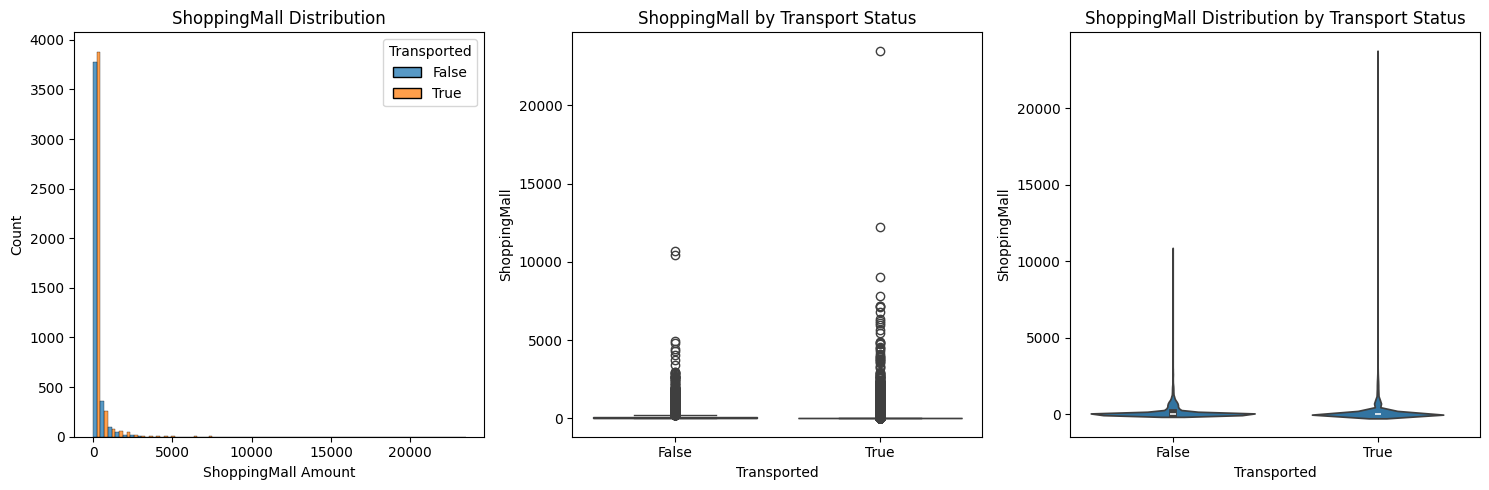

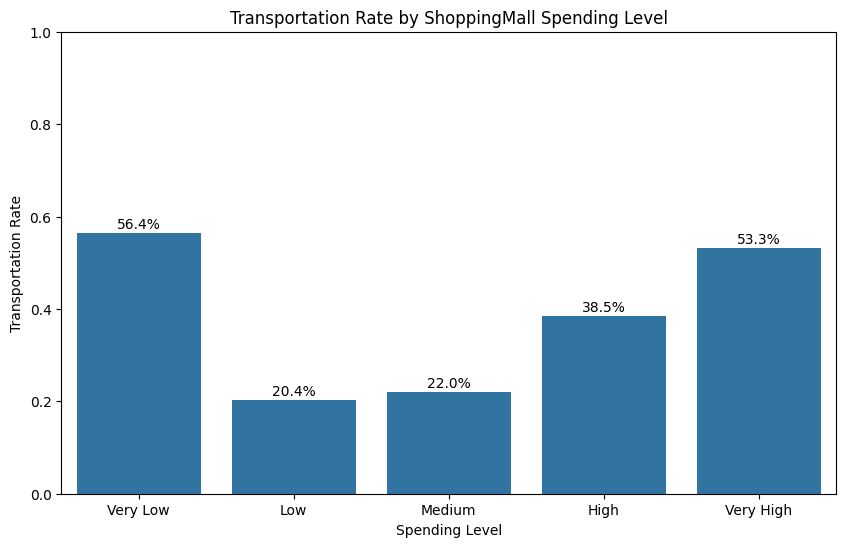


=== ShoppingMall Analysis ===

Summary statistics by transportation status:
              count        mean         std  min  25%  50%   75%      max
Transported                                                              
False        4315.0  163.915875  452.189220  0.0  0.0  0.0  87.0  10705.0
True         4378.0  175.147328  713.137397  0.0  0.0  0.0   0.0  23492.0

Mann-Whitney U test p-value: 0.0000000000

Passengers with zero ShoppingMall spending: 5795 (66.7%)
Transportation rate for zero spending: 59.7%
Transportation rate for non-zero spending: 31.7%


In [37]:
analyze_spending_feature(train_df, 'ShoppingMall')

### Spa

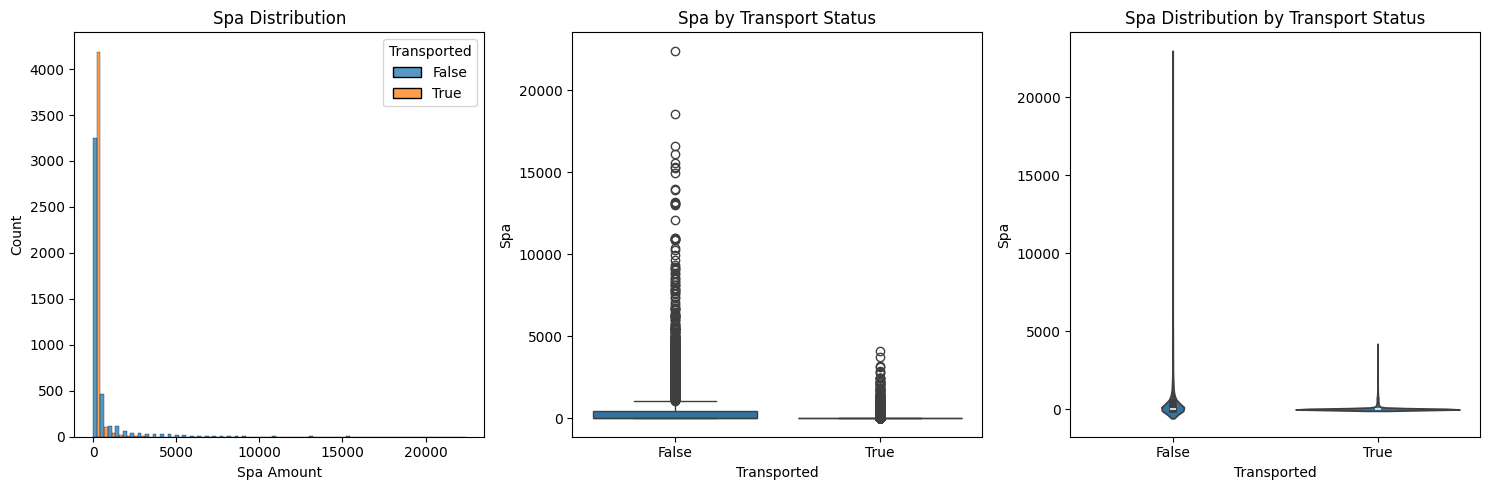

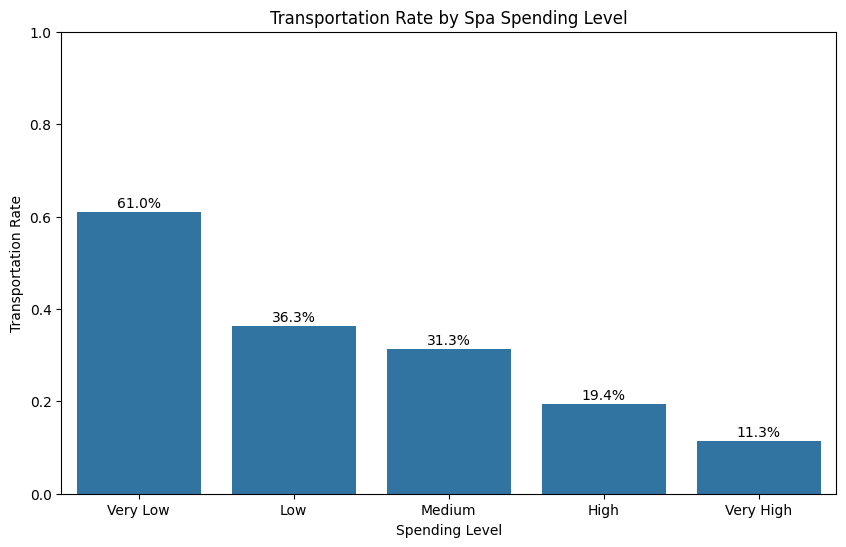


=== Spa Analysis ===

Summary statistics by transportation status:
              count        mean          std  min  25%  50%    75%      max
Transported                                                                
False        4315.0  552.349479  1536.889212  0.0  0.0  2.0  431.0  22408.0
True         4378.0   60.393559   260.086792  0.0  0.0  0.0    0.0   4103.0

Mann-Whitney U test p-value: 0.0000000000

Passengers with zero Spa spending: 5507 (63.3%)
Transportation rate for zero spending: 63.4%
Transportation rate for non-zero spending: 27.7%


In [38]:
analyze_spending_feature(train_df, 'Spa')

### VRDeck

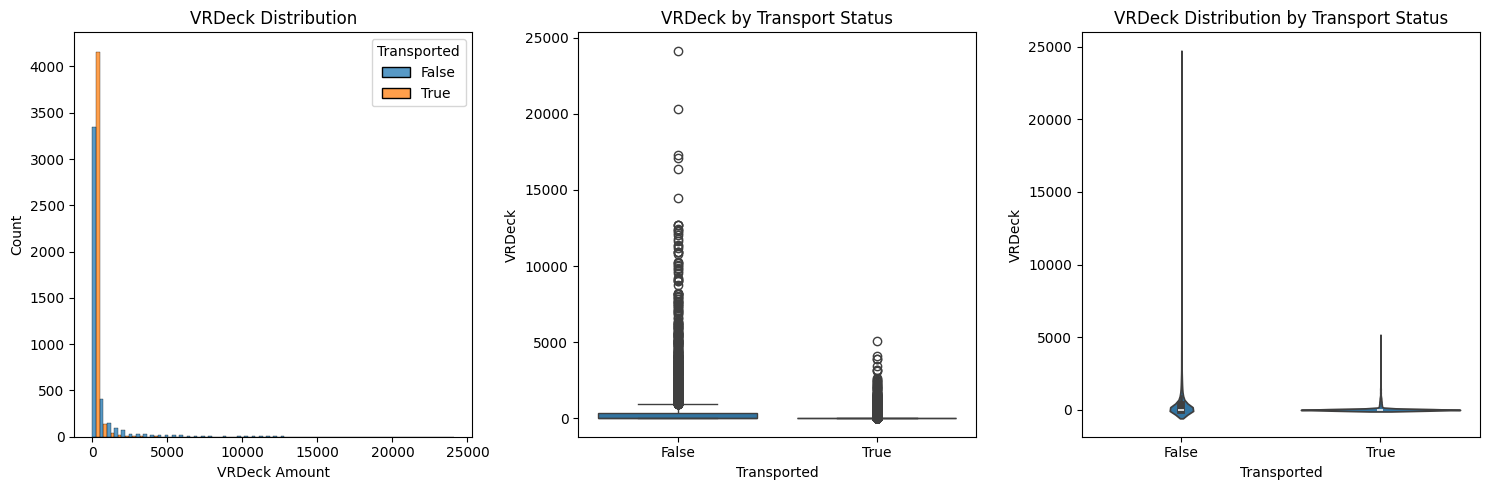

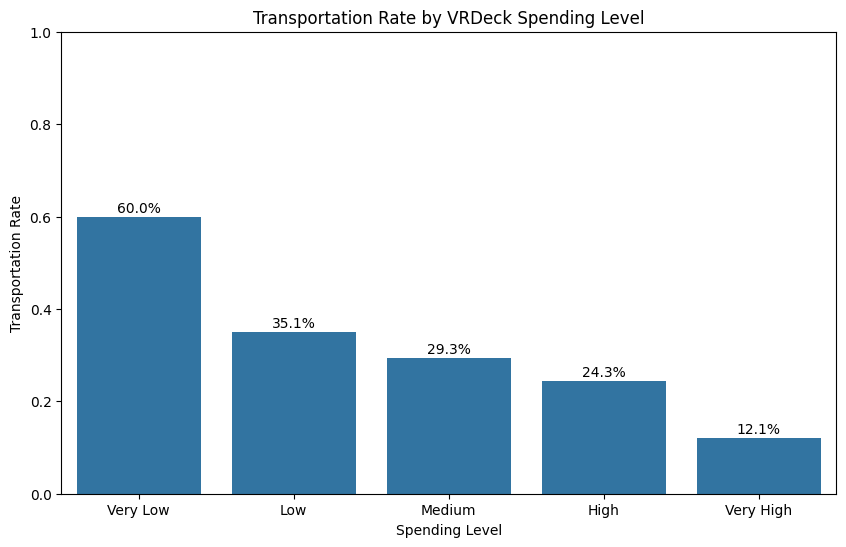


=== VRDeck Analysis ===

Summary statistics by transportation status:
              count        mean          std  min  25%  50%    75%      max
Transported                                                                
False        4315.0  532.291078  1548.647933  0.0  0.0  1.0  371.5  24133.0
True         4378.0   67.600274   288.556015  0.0  0.0  0.0    0.0   5063.0

Mann-Whitney U test p-value: 0.0000000000

Passengers with zero VRDeck spending: 5683 (65.4%)
Transportation rate for zero spending: 62.4%
Transportation rate for non-zero spending: 27.5%


In [39]:
analyze_spending_feature(train_df, 'VRDeck')

### Name

In [42]:
train_df['Name'].dtype

dtype('O')

In [47]:
# Extract first and last initials from Name
train_df['FirstInitial'] = train_df['Name'].str[0]
train_df['LastInitial'] = train_df['Name'].apply(lambda x: str(x).split()[-1][0])

# Display the Name column and new initial columns
train_df[['Name', 'FirstInitial', 'LastInitial']].head()

,Name,FirstInitial,LastInitial
0,Maham Ofracculy,M,O
1,Juanna Vines,J,V
2,Altark Susent,A,S
3,Solam Susent,S,S
4,Willy Santantines,W,S


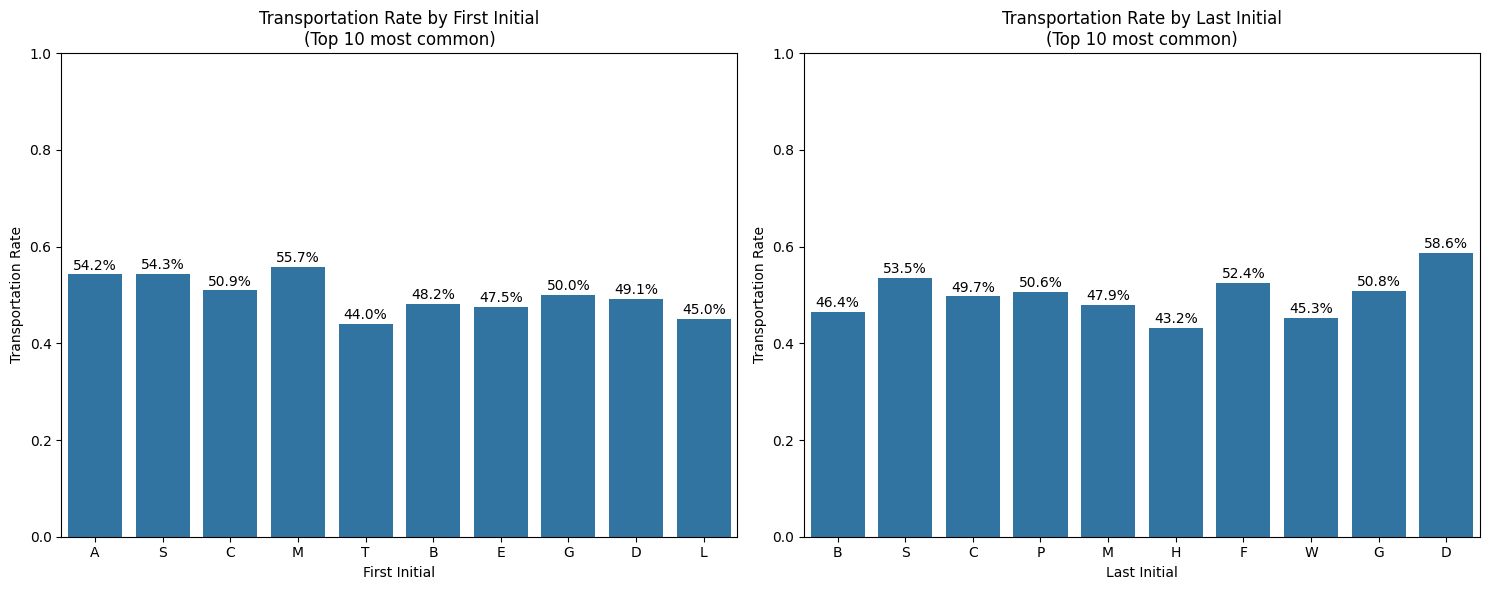


First Initial Analysis:
Chi-square test p-value: 0.0001629499

Most common first initials and their transportation rates:
              Transport_Rate  Count
FirstInitial                       
A                      0.542    920
S                      0.543    656
C                      0.509    642
M                      0.557    578
T                      0.440    504
B                      0.482    494
E                      0.475    467
G                      0.500    462
D                      0.491    444
L                      0.450    433

Last Initial Analysis:
Chi-square test p-value: 0.0000375515

Most common last initials and their transportation rates:
             Transport_Rate  Count
LastInitial                       
B                     0.464    918
S                     0.535    874
C                     0.497    857
P                     0.506    693
M                     0.479    683
H                     0.432    567
F                     0.524    456
W        

In [48]:
# Analyze First Initial
# Calculate transportation rate by FirstInitial
transport_by_first = train_df.groupby('FirstInitial')['Transported'].agg(['mean', 'count'])
transport_by_first.columns = ['Transport_Rate', 'Count']
transport_by_first = transport_by_first.sort_values('Count', ascending=False)

# Plot for First Initial
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=transport_by_first.index[:10], y='Transport_Rate', data=transport_by_first[:10])
plt.title('Transportation Rate by First Initial\n(Top 10 most common)')
plt.xlabel('First Initial')
plt.ylabel('Transportation Rate')
plt.ylim(0, 1)

# Add percentage labels
for i, v in enumerate(transport_by_first['Transport_Rate'][:10]):
    plt.text(i, v + 0.01, f'{v:.1%}', ha='center')

# Analyze Last Initial
# Calculate transportation rate by LastInitial
transport_by_last = train_df.groupby('LastInitial')['Transported'].agg(['mean', 'count'])
transport_by_last.columns = ['Transport_Rate', 'Count']
transport_by_last = transport_by_last.sort_values('Count', ascending=False)

# Plot for Last Initial
plt.subplot(1, 2, 2)
sns.barplot(x=transport_by_last.index[:10], y='Transport_Rate', data=transport_by_last[:10])
plt.title('Transportation Rate by Last Initial\n(Top 10 most common)')
plt.xlabel('Last Initial')
plt.ylabel('Transportation Rate')
plt.ylim(0, 1)

# Add percentage labels
for i, v in enumerate(transport_by_last['Transport_Rate'][:10]):
    plt.text(i, v + 0.01, f'{v:.1%}', ha='center')

plt.tight_layout()
plt.show()

# Chi-square tests
from scipy.stats import chi2_contingency

# For First Initial
first_contingency = pd.crosstab(train_df['FirstInitial'], train_df['Transported'])
chi2_first, p_value_first, _, _ = chi2_contingency(first_contingency)

# For Last Initial
last_contingency = pd.crosstab(train_df['LastInitial'], train_df['Transported'])
chi2_last, p_value_last, _, _ = chi2_contingency(last_contingency)

# Print statistical results
print("\nFirst Initial Analysis:")
print(f"Chi-square test p-value: {p_value_first:.10f}")
print("\nMost common first initials and their transportation rates:")
print(transport_by_first[:10].round(3))

print("\nLast Initial Analysis:")
print(f"Chi-square test p-value: {p_value_last:.10f}")
print("\nMost common last initials and their transportation rates:")
print(transport_by_last[:10].round(3))

# Additional analysis of distribution
print("\nNumber of unique first initials:", len(transport_by_first))
print("Number of unique last initials:", len(transport_by_last))

# Distribution of counts
print("\nFirst Initial distribution statistics:")
print(transport_by_first['Count'].describe().round(2))
print("\nLast Initial distribution statistics:")
print(transport_by_last['Count'].describe().round(2))

### Transported 

Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [15]:
train_df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64